[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# Train Soccer Player Detector

---

[![Download Dataset](https://app.roboflow.com/images/download-dataset-badge.svg)](https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc)

This notebook is based on the [How to Train YOLOv8 Object Detection on a Custom Dataset](https://github.com/roboflow/notebooks/blob/main/notebooks/train-yolov8-object-detection-on-custom-dataset.ipynb) notebook from the [roboflow/notebooks](https://github.com/roboflow/notebooks) repository.

## Configure API keys

- Open your [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Click `Copy`. This will place your private key in the clipboard.
- In Colab, go to the left pane and click on `Secrets` (🔑). Store Roboflow API Key under the name `ROBOFLOW_API_KEY`.

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [4]:
!nvidia-smi

Sat Dec  7 20:52:19 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.58.02              Driver Version: 555.58.02      CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070 ...    Off |   00000000:01:00.0  On |                  N/A |
|  0%   39C    P8             18W /  295W |     541MiB /  16376MiB |     26%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [9]:
import os
HOME = os.getcwd()
print(HOME)

/home/shan/proj/sports/examples/soccer/notebooks


## Install dependencies

In [ ]:
!pip install -q ultralytics==8.0.196


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


## Imports

In [ ]:
# from roboflow import Roboflow
# from google.colab import userdata
from IPython.display import Image

## Pull dataset

In [ ]:
# !mkdir {HOME}/datasets
# %cd {HOME}/datasets

# ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
# rf = Roboflow(api_key=ROBOFLOW_API_KEY)

# project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
# version = project.version(10)
# dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to football-players-detection-10 in yolov8:: 100%|██████████| 636/636 [00:00<00:00, 12987.36it/s]


**NOTE:** Update `data.yaml` structure to align with the latest requirements of the `ultralytics` package.



In [14]:
%cd {HOME}
dataset_location = '/home/shan/proj/sports/examples/soccer/notebooks/datasets/football-players-detection.v12i.yolov8'
!sed -i 's|\(train: \).*|\1../train/images|' {dataset_location}/data.yaml
!sed -i 's|\(val: \).*|\1../valid/images|' {dataset_location}/data.yaml

/home/shan/proj/sports/examples/soccer/notebooks


## Custom training

In [19]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8x.pt data={dataset_location}/data.yaml batch=4 epochs=50 imgsz=1280 plots=True

/home/shan/proj/sports/examples/soccer/notebooks
Ultralytics 8.3.44 🚀 Python-3.8.20 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4070 Ti SUPER, 15973MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/home/shan/proj/sports/examples/soccer/notebooks/datasets/football-players-detection.v12i.yolov8/data.yaml, epochs=50, time=None, patience=100, batch=4, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, reti

In [36]:

HOME = os.getcwd() + '/../../..'
!ls {HOME}/runs/detect/train/

args.yaml			 R_curve.png	      train_batch3002.jpg
confusion_matrix_normalized.png  results.csv	      val_batch0_labels.jpg
confusion_matrix.png		 results.png	      val_batch0_pred.jpg
F1_curve.png			 train_batch0.jpg     val_batch1_labels.jpg
labels_correlogram.jpg		 train_batch1.jpg     val_batch1_pred.jpg
labels.jpg			 train_batch2.jpg     val_batch2_labels.jpg
P_curve.png			 train_batch3000.jpg  val_batch2_pred.jpg
PR_curve.png			 train_batch3001.jpg  weights


/home/shan/proj/sports


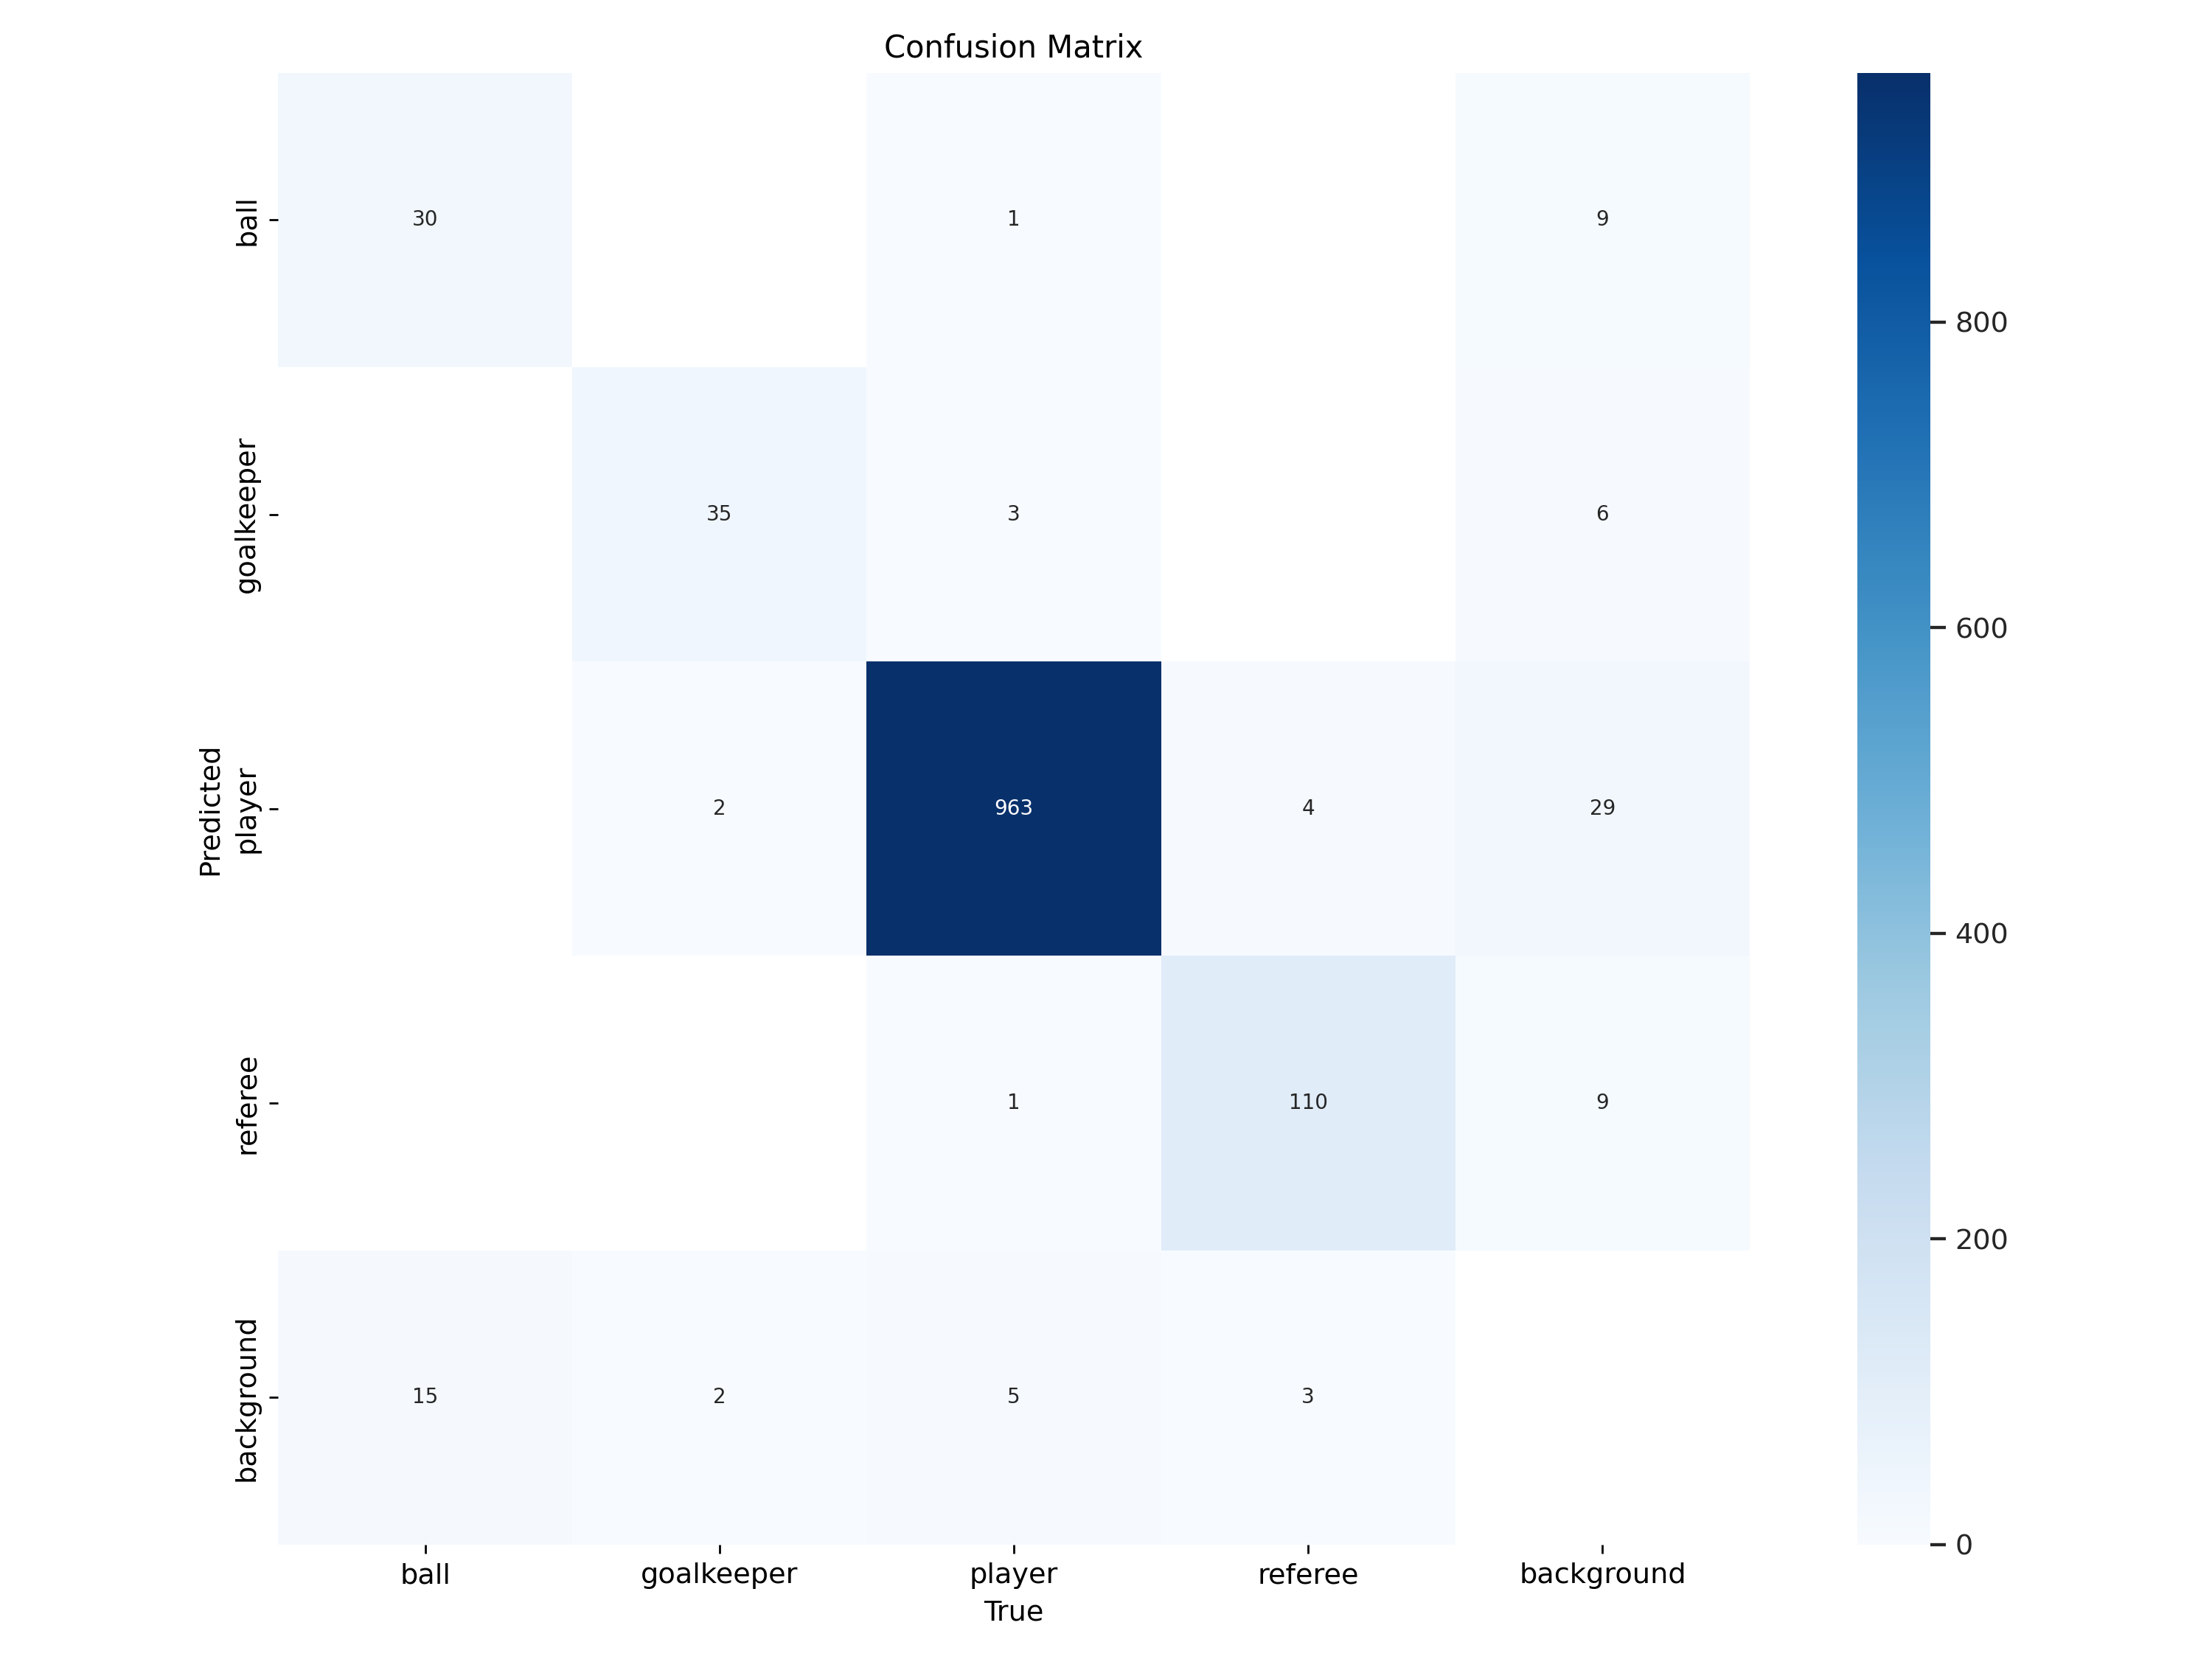

In [37]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/home/shan/proj/sports


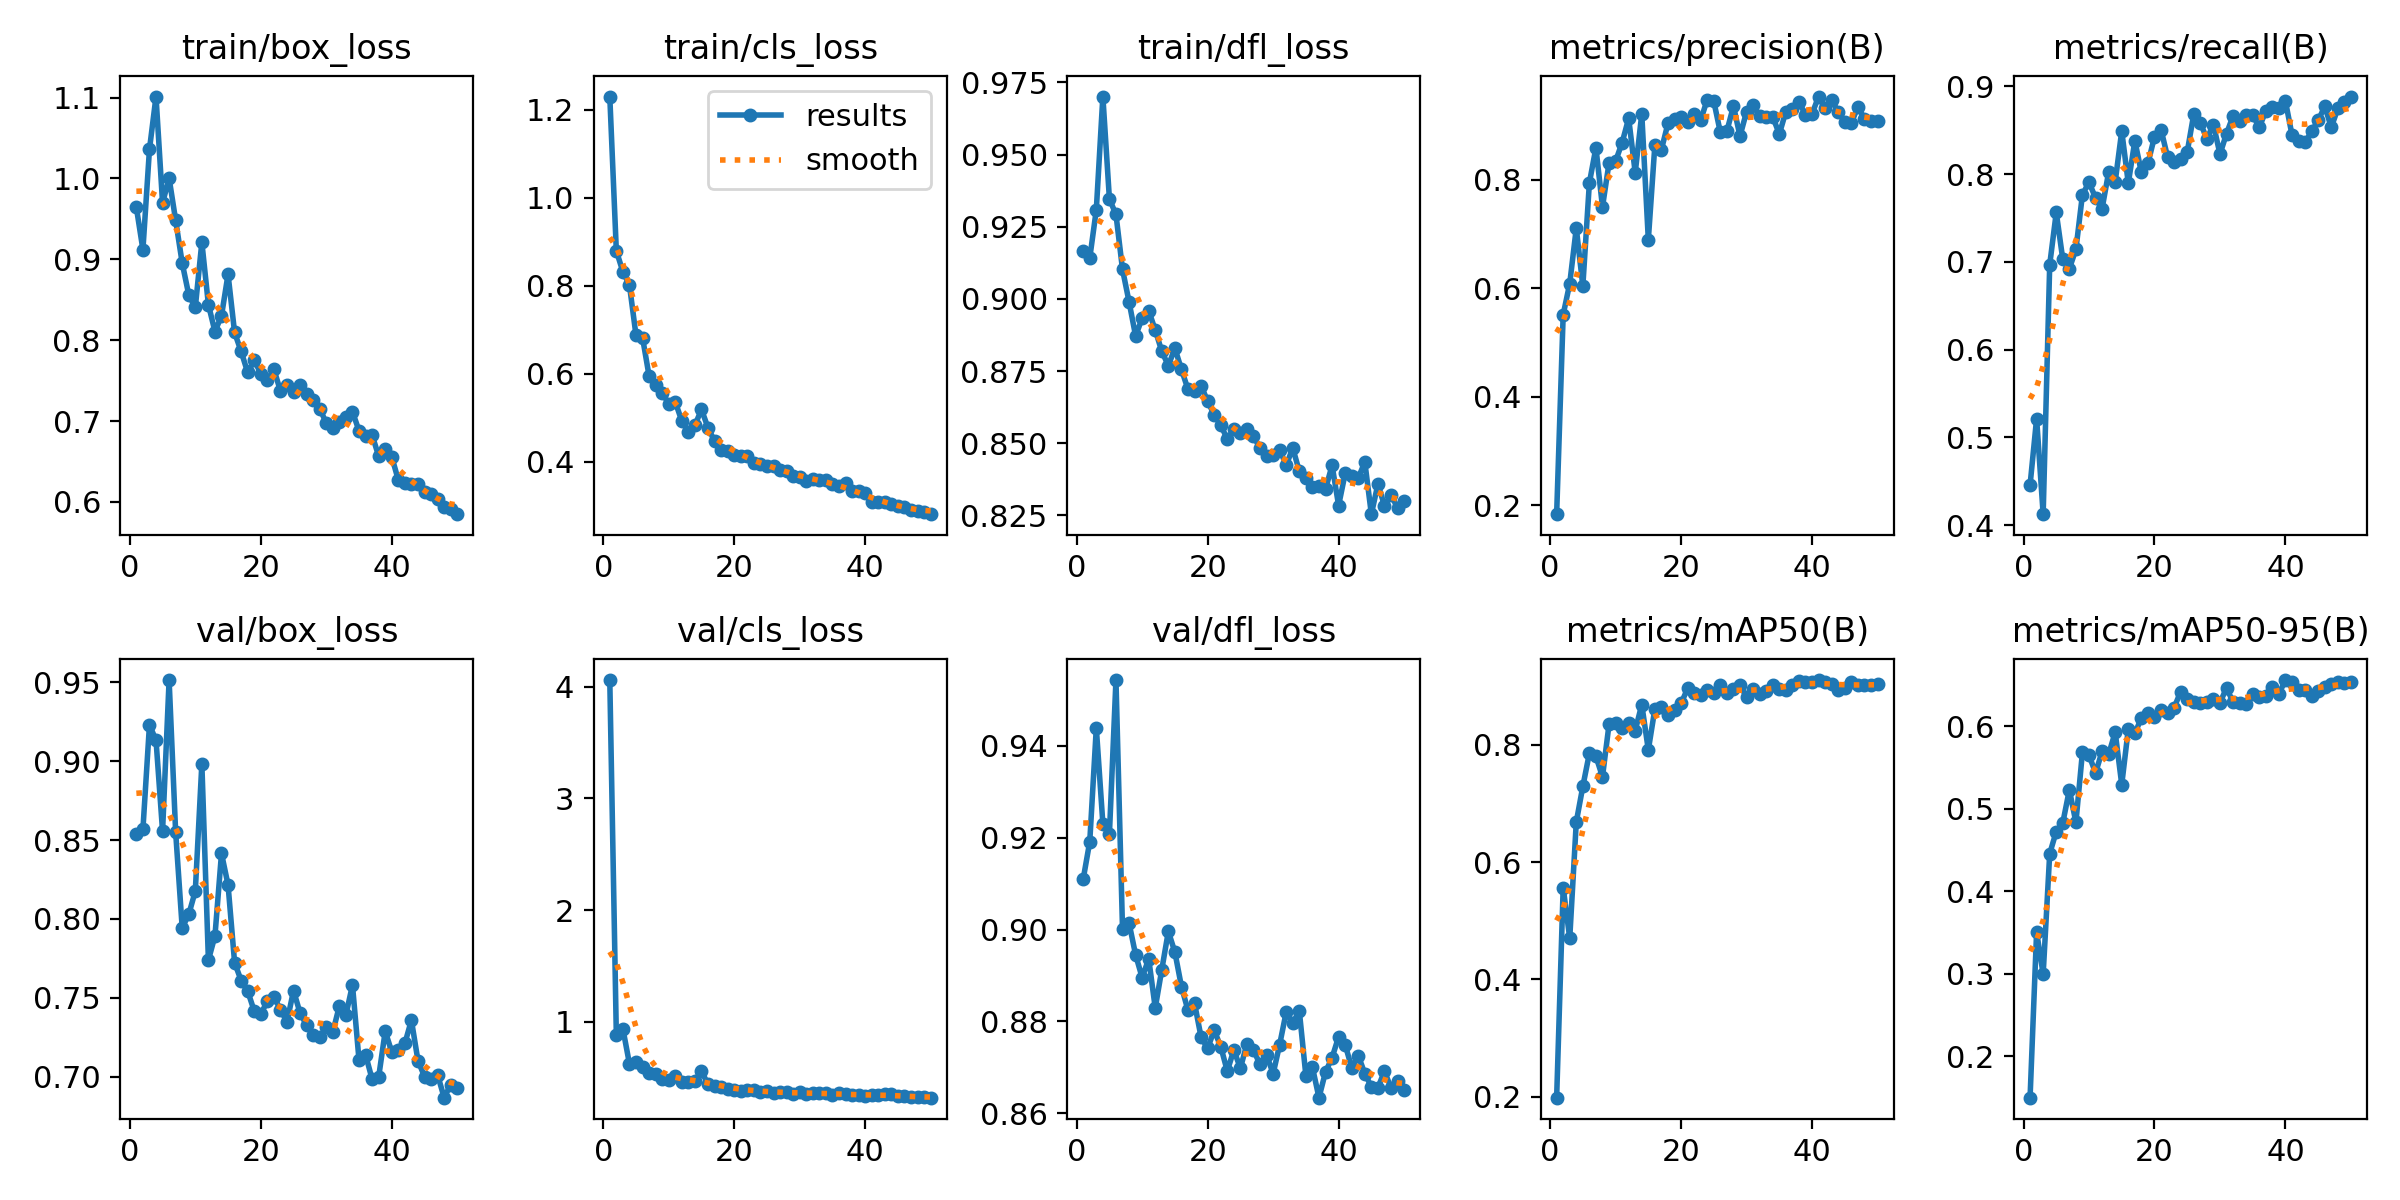

In [38]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/home/shan/proj/sports


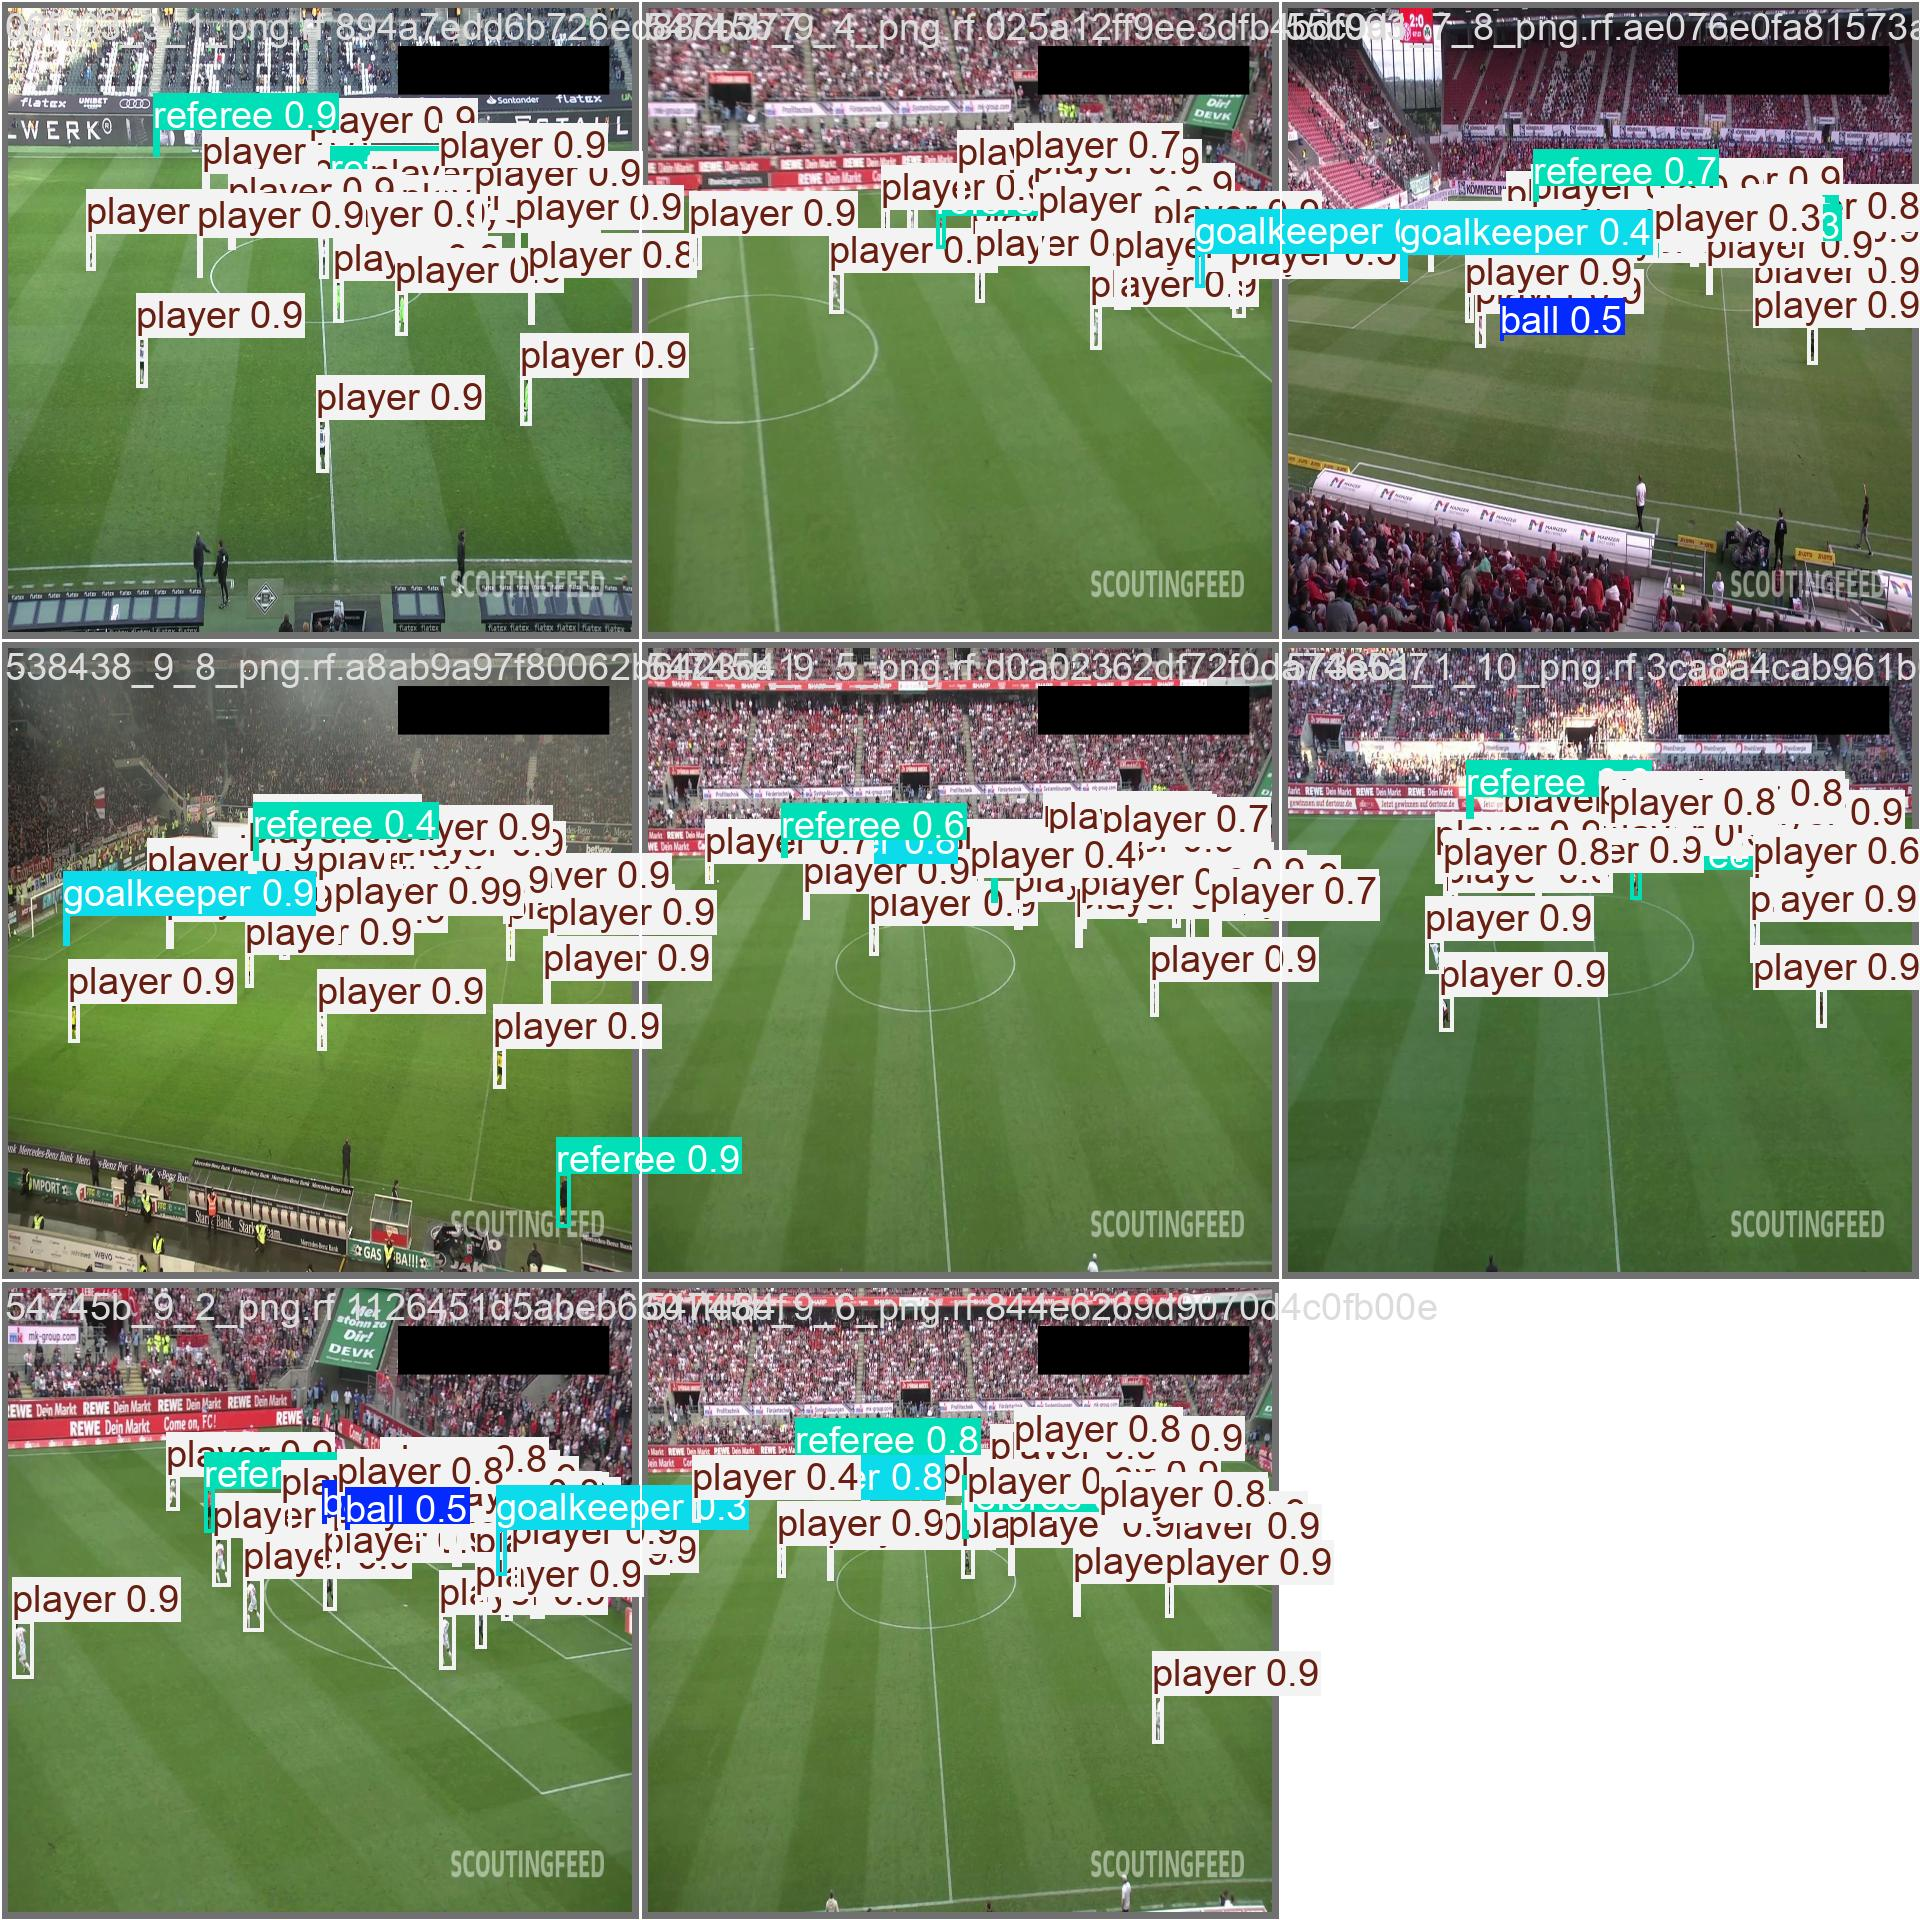

In [39]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate custom model

In [41]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset_location}/data.yaml imgsz=1280

/home/shan/proj/sports
Ultralytics 8.3.44 🚀 Python-3.8.20 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4070 Ti SUPER, 15973MiB)
Model summary (fused): 268 layers, 68,127,420 parameters, 0 gradients, 257.4 GFLOPs
val: Scanning /home/shan/proj/sports/examples/soccer/notebooks/datasets/football
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         49       1174      0.921      0.883      0.907       0.67
                  ball         45         45       0.84      0.667      0.706      0.359
            goalkeeper         38         39      0.922      0.912      0.946      0.742
                player         49        973      0.973       0.99      0.995      0.854
               referee         49        117      0.949      0.962      0.981      0.726
Speed: 5.3ms preprocess, 55.2ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to /home/shan/proj/sports/runs/detect/val
💡 Learn more at https://docs.ultralytics.c

## Deploy model on Roboflow

In [12]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

Dependency ultralytics==8.0.196 is required but found version=8.3.44, to fix: `pip install ultralytics==8.0.196`


SystemExit: 1